# For Unit conversion

In [18]:
from astropy import units as u

In [27]:
## Provide the list of values for Gamma  in units of Gyr(^-1)

Gamma = [1/300,1/100,1/30,1/10]

temp = [1/300,1/100,1/30,1/10]*u.Gyr**-1
Gamma_dcdm = temp.to(u.km/u.Mpc/u.s).value

In [28]:
Gamma_dcdm

array([ 3.25930741,  9.77792222, 32.59307406, 97.77922217])

In [68]:
## Default values used in the paper, please comment them in case you don't want to use these values 
epsilon = np.array([0.4999, 0.1, 0.01, 0.001])
Gamma_dcdm = np.array([3.2679,9.8039, 32.679, 98.0392])

# Common Settings

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

#set general configuration
common_settings = {'output':'tCl,pCl,lCl, mPk',
                   'lensing':'yes',
                   'l_max_scalars':2600,
                   'n_s':0.9673,
                   'ln10^{10}A_s':3.052,
                   'tau_reio':0.0582,
                   'omega_b': 0.0224,
                   '100*theta_s':1.042168,
                   'P_k_max_h/Mpc':1.0
                   }


In [38]:
colors = ['red','green','blue','black']

## Reference Model

In [7]:
ref = Class()
ref.set(common_settings)
ref.set({
        'omega_cdm': 0.1194,
        'N_ncdm':1,
        'background_ncdm_distribution': 0,
        'N_ur':2.0328,
        'm_ncdm':0.06
        })
ref.compute()

In [41]:
kk = np.logspace(-4,np.log10(1),10000) # k in h/Mpc
pk_ref = np.vectorize(ref.pk)(kk*ref.h(),0) * ref.h()**3

In [46]:
## Saving the result for future use - uncomment to save it
# np.save('pk_ref',pk_ref)

# Varying $\epsilon$

In [39]:
varying_eps = {
'omega_cdm': 0.00001,
'omega_ini_dcdm2':  0.1194,
'Gamma_dcdm': 32.593,
'M_dcdm': 1,
'background_ncdm_distribution': '0,1',
'Quadrature strategy': '0,4',
'N_ncdm': 2,
'N_ur':2.0328,
'm_ncdm':'0.06,0',
'evolver': 0,
'ncdm_fluid_approximation': 2,
'ncdm_fluid_trigger_tau_over_tau_k': 25,
'Number of momentum bins perturbs': '50,300',
'massive_daughter_perturbations': 'yes',
'dark_radiation_perturbations': 'yes'
}
M=Class()

In [40]:
for i in range(len(epsilon)) :
    M.empty()
    M.set(common_settings)
    M.set(varying_eps)
    M.set({'epsilon_dcdm' : epsilon[i]})
    M.compute()
    globals()['pk_M_e_'+str(i)] = np.vectorize(M.pk)(kk*M.h(),0) * M.h()**3

In [47]:
### The arrays are saved just to save time in case we are plotting them again.

# np.save('eps=0.5',pk_M_e_0)
# np.save('eps=0.1',pk_M_e_1)
# np.save('eps=0.01',pk_M_e_2)
# np.save('eps=0.001',pk_M_e_3)

In [49]:
### Load these arrays if needed - uncomment to load them

# pk_M_e_0=np.load('eps=0.5'+'.npy')
# pk_M_e_1=np.load('eps=0.5'+'.npy')
# pk_M_e_2=np.load('eps=0.01'+'.npy')
# pk_M_e_3=np.load('eps=0.001'+'.npy')

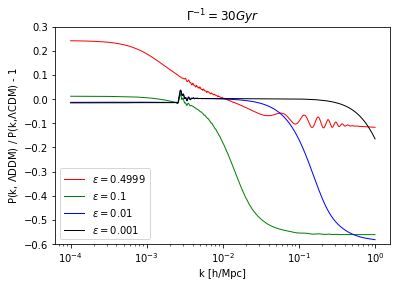

In [70]:
### This reproduces figure 4 (right) of https://arxiv.org/pdf/2102.12498.pdf
for i in range(4):
    plt.semilogx(kk,(eval('pk_M_e_'+str(i))/pk_ref)-np.ones_like(pk_ref),label=r'$\epsilon={a}$'.format(a=epsilon[i]),color=colors[i],lw=1)
plt.ylim((-.6,.3))
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'P(k, $\Lambda$DDM) / P(k,$\Lambda$CDM) - 1')
plt.title(r'$\Gamma^{-1} = 30 Gyr $')
plt.legend()

# Varying Gamma

In [53]:
varying_gamma = {
'omega_cdm': 0.00001,
'omega_ini_dcdm2':  0.1194,
'M_dcdm': 1,
'background_ncdm_distribution': '0,1',
'Quadrature strategy': '0,4',
'N_ncdm': 2,
'N_ur':2.0328,
'm_ncdm':'0.06,0',
'epsilon_dcdm': 0.1,   
'evolver': 0,
'ncdm_fluid_approximation': 2,
'ncdm_fluid_trigger_tau_over_tau_k': 25,
'Number of momentum bins perturbs': '50,300',
'massive_daughter_perturbations': 'yes',
'dark_radiation_perturbations': 'yes'
}
M=Class()

In [54]:
for i in range(len(Gamma_dcdm)) :
    M.empty()
    M.set(common_settings)
    M.set(varying_gamma)
    M.set({'Gamma_dcdm' : Gamma_dcdm[i]})
    M.compute()
    globals()['pk_M_G_'+str(i)] = np.vectorize(M.pk)(kk*M.h(),0) * M.h()**3

In [58]:
# np.save('gamma=300',pk_M_G_0)
# np.save('gamma=100',pk_M_G_1)
# np.save('gamma=30',pk_M_G_2)
# np.save('gamma=10',pk_M_G_3)

In [59]:
# pk_M_G_0=np.load('gamma=300'+'.npy')
# pk_M_G_1=np.load('gamma=100'+'.npy')
# pk_M_G_2=np.load('gamma=30'+'.npy')
# pk_M_G_3=np.load('gamma=10'+'.npy')

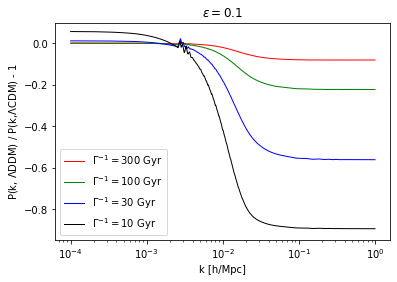

In [69]:
### This reproduces figure 4 left of https://arxiv.org/pdf/2102.12498.pdf
labels = ['300 Gyr', '100 Gyr', '30 Gyr', '10 Gyr']
for i in range(4):
    plt.semilogx(kk,(eval('pk_M_G_'+str(i))/pk_ref)-np.ones_like(pk_ref),label=r'$\Gamma^{-1} = $' + labels[i],color=colors[i],lw=1)
plt.ylim((-.95,.1))
plt.title(r'$\epsilon = 0.1$')
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'P(k, $\Lambda$DDM) / P(k,$\Lambda$CDM) - 1')
plt.legend()